In [1]:
%pylab inline
import os
import downglacier.sandbox.tcd_utils as utils
import downglacier.graphics as dgplot
import seaborn as sns
import pandas as pd
from datetime import datetime as dt
pal = sns.color_palette('pastel')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.2)
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = utils.get_all_sst_df(lag=3)

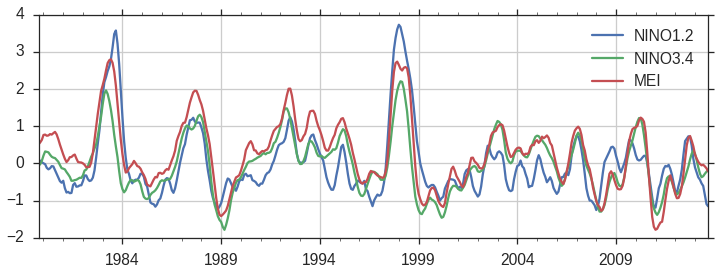

In [3]:
fig = plt.figure(figsize=(12, 4), dpi=200)
ax = fig.add_subplot(111)
df[['NINO1.2', 'NINO3.4', 'MEI']].plot(ax=ax);
plt.savefig(os.path.join(utils.get_plot_dir(), 'response_indexes.pdf'))

In [4]:
df[['NINO1.2', 'NINO3.4', 'MEI']].corr()**2

NINO1.2   NINO3.4       MEI
NINO1.2  1.000000  0.457153  0.614800
NINO3.4  0.457153  1.000000  0.877836
MEI      0.614800  0.877836  1.000000

In [5]:
wd = utils.run_standard(run=False)
odir = os.path.join(wd, 'output')
dfd = pd.read_csv(os.path.join(odir, 'diagnostics', 'predict_ts.csv'), index_col=0, 
                               parse_dates= {"time" : [0]}).loc[dt(1979,10,1):dt(2013,9,1)]
dfi = pd.read_csv(os.path.join(odir, 'diagnostics', 'predict_info.csv'), index_col=0).T
# filter keys fir height
dfi.columns = [s.split('_')[0] + '_' + s.split('_')[2] for s in dfi.columns]
dfd.columns = [s.split('_')[0] + '_' + s.split('_')[2] for s in dfd.columns]
varkeys = dfd.columns
dfe = dfd * 0.
for varn in dfd.columns:
    err = dfi.loc['rmse', varn]
    if varn in ['mbtotfromsum_diag', 'mbtot_ds']: 
        err = (250 + err) / sqrt(2)
    dfe[varn].iloc[:] = err

In [6]:
lags = [0, 1, 2, 3, 4, 5]
col_list = []
for l in lags:
    dfsst = utils.get_all_sst_df(lag=l)
    dfd['yi'] = dfsst['yi']
    
    cname = 'nino1.2_lag{}'.format(l)
    dfd[cname] = dfsst['NINO1.2']
    col_list.append(cname)
    
    cname = 'nino3.4_lag{}'.format(l)
    dfd[cname] = dfsst['NINO3.4']
    col_list.append(cname)
    
    cname = 'mei_lag{}'.format(l)
    dfd[cname] = dfsst['MEI']
    col_list.append(cname)

In [7]:
ydf = dfd.groupby('yi').mean()
ydf['MB'] = dfd.groupby('yi').sum()['mbtotfromsum_diag']
dfd['MB'] = dfd['mbtotfromsum_diag']

In [8]:
cts = (ydf[['MB'] + col_list].corr()**2).iloc[1:, 0]

In [13]:
cdf = pd.DataFrame(columns=['nino1.2', 'nino3.4', 'mei'], index=[0,1,2,3,4,5])

In [14]:
for c, v in cts.items():
    cdf.loc[int(c[-1]), c.split('_')[0]] = v

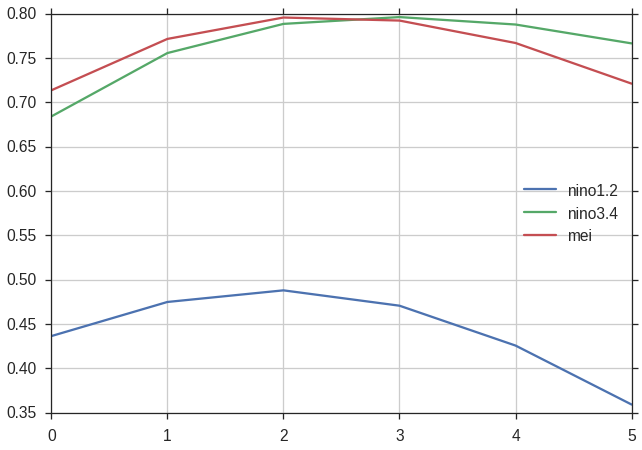

In [15]:
cdf.plot();

In [17]:
def forma(x):
    return '{:.2f}'.format(x)
print(cdf.T.to_latex(escape=False, bold_rows=True, index_names=False, float_format=forma))

\begin{tabular}{lllllll}
\toprule
{} &    0 &    1 &    2 &    3 &    4 &    5 \\
\midrule
nino1.2 & 0.44 & 0.47 & 0.49 & 0.47 & 0.43 & 0.36 \\
nino3.4 & 0.68 & 0.76 & 0.79 & 0.80 & 0.79 & 0.77 \\
mei     & 0.71 & 0.77 & 0.80 & 0.79 & 0.77 & 0.72 \\
\bottomrule
\end{tabular}

